In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool

llm = ChatOpenAI()

@tool 
def multiply(a: int, b: int) -> int:
    """ 
    This function is used to multiply two integers a and b.

    Args: 
        a: the first int
        b: the second int

    Returns:
        The result of the multiplication a * b
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

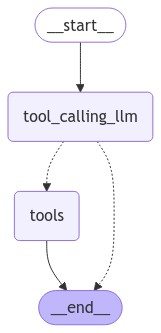

In [3]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition

# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([multiply]))

# Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message from assistant is a tool call -> tools_condition routes to tools
    # If the latest message from assistant is not a tool call -> tools_condition routes to END
    tools_condition
    )

builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))




In [5]:
from langchain_core.messages import HumanMessage
reply = graph.invoke({"messages": HumanMessage(content="What is 3 times 4?")})

for m in reply['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 3 times 4?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_uJqZj3ODC9KjFh2onmNJydL4)
 Call ID: call_uJqZj3ODC9KjFh2onmNJydL4
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: multiply

12
